# Estadistica Descriptiva

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import pandas as pd
import pathlib
plt.style.use('fivethirtyeight')
import os
from utils import plotUtils
import datetime as dt
import matplotlib.dates as mdates

In [2]:
fname_gas = pathlib.Path().resolve() / "data" / "FuturosGasNatural.csv"
fname_petroleo_brent = pathlib.Path().resolve() / "data" / "FuturosPetroleoBrent.csv"
fname_petroleo_wti = pathlib.Path().resolve() / "data" / "FuturosPetroleoWTI.csv"
fname_carbon = pathlib.Path().resolve() / "data" / "FuturosCarbon.csv"

# carbon https://www.investing.com/commodities/coal-cme-futures-historical-data

In [3]:
gas = pd.read_csv(fname_gas, decimal=',')
petroleo_brent = pd.read_csv(fname_petroleo_brent, decimal=',')
petroleo_wti = pd.read_csv(fname_petroleo_wti, decimal=',')
carbon = pd.read_csv(fname_carbon, decimal='.')

In [4]:
gas

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2022,8.105,8.135,8.499,7.909,-,"-3,14%"
1,18.05.2022,8.368,8.318,8.548,8.160,"80,72K","0,77%"
2,17.05.2022,8.304,8.016,8.372,8.015,"76,67K","4,37%"
3,16.05.2022,7.956,7.700,8.183,7.663,"93,52K","3,82%"
4,13.05.2022,7.663,7.673,7.919,7.515,"85,04K","-0,98%"
...,...,...,...,...,...,...,...
3717,08.01.2008,7.967,7.909,8.000,7.880,"53,78K","1,12%"
3718,07.01.2008,7.879,7.803,7.940,7.701,"56,68K","0,48%"
3719,04.01.2008,7.841,7.652,7.859,7.500,"61,50K","2,18%"
3720,03.01.2008,7.674,7.873,7.980,7.610,"72,74K","-2,24%"


In [5]:
petroleo_brent

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2022,111.30,108.10,112.30,105.71,"270,76K","1,88%"
1,18.05.2022,109.25,112.90,114.14,108.39,"244,17K","-3,17%"
2,17.05.2022,112.83,114.26,115.68,111.10,"275,24K","-1,05%"
3,16.05.2022,114.03,112.40,114.77,109.01,"215,80K","1,44%"
4,15.05.2022,112.41,111.80,112.49,111.52,"4,38K","1,07%"
...,...,...,...,...,...,...,...
3725,08.01.2008,95.54,94.77,96.69,94.47,"121,23K","1,22%"
3726,07.01.2008,94.39,96.69,97.48,93.72,"106,50K","-2,48%"
3727,04.01.2008,96.79,97.77,98.00,96.18,"98,47K","-0,83%"
3728,03.01.2008,97.60,97.45,98.50,97.04,"84,86K","-0,25%"


In [6]:
petroleo_wti

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2022,109.28,105.65,110.14,103.25,-,"-0,28%"
1,18.05.2022,109.59,113.66,115.42,108.46,"103,67K","-2,50%"
2,17.05.2022,112.40,113.87,115.56,111.75,"252,63K","-1,58%"
3,16.05.2022,114.20,110.98,114.90,108.11,"289,13K","3,36%"
4,13.05.2022,110.49,106.65,110.64,106.29,"240,99K","4,11%"
...,...,...,...,...,...,...,...
3718,08.01.2008,96.33,95.35,97.54,95.26,"287,52K","1,30%"
3719,07.01.2008,95.09,97.79,98.40,94.47,"258,89K","-2,88%"
3720,04.01.2008,97.91,99.17,99.41,97.10,"231,79K","-1,28%"
3721,03.01.2008,99.18,99.23,100.09,98.45,"241,27K","-0,44%"


In [7]:
carbon

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 27, 2020",34.05,34.05,34.05,34.05,-,0.00%
1,"Mar 26, 2020",34.05,34.05,34.05,34.05,-,0.00%
2,"Mar 25, 2020",34.05,34.05,34.05,34.05,-,0.00%
3,"Mar 24, 2020",34.05,34.05,34.05,34.05,-,0.00%
4,"Mar 23, 2020",34.05,34.05,34.05,34.05,-,0.00%
...,...,...,...,...,...,...,...
2330,"Feb 28, 2011",70.35,70.35,70.35,70.35,-,0.64%
2331,"Feb 25, 2011",69.90,69.90,69.90,69.90,-,-0.50%
2332,"Feb 24, 2011",70.25,70.25,70.25,70.25,-,-1.06%
2333,"Feb 23, 2011",71.00,71.00,71.00,71.00,-,0.00%


## Last Price of the day

In [8]:
last_price_day_gas = gas["Último"]
last_price_day_petroleo_brent = petroleo_brent["Último"]
last_price_day_petroleo_wti = petroleo_wti["Último"]
last_price_day_carbon = carbon["Price"]

## Evolución Temporal

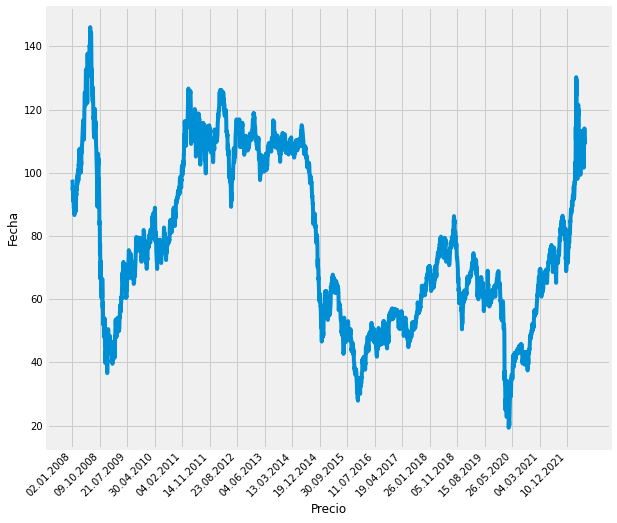

In [9]:
plotUtils.plotFunctionWithDates(last_price_day_petroleo_brent, petroleo_brent["Fecha"], "2008 - 2022", "Precio", "Fecha")

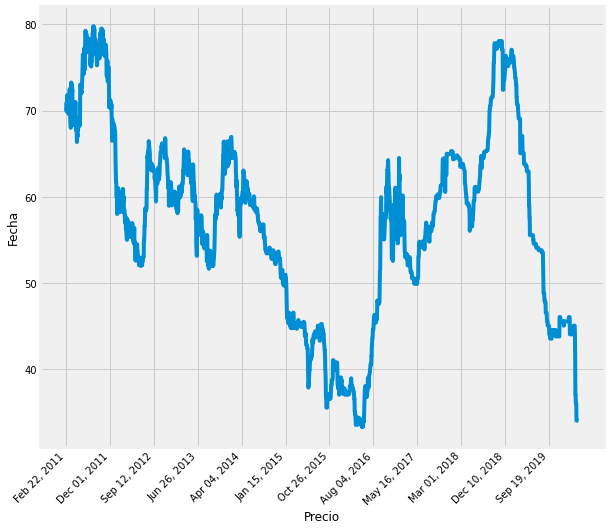

In [11]:
plotUtils.plotFunctionWithDates(last_price_day_carbon, carbon["Date"], "2008 - 2022", "Precio", "Fecha")

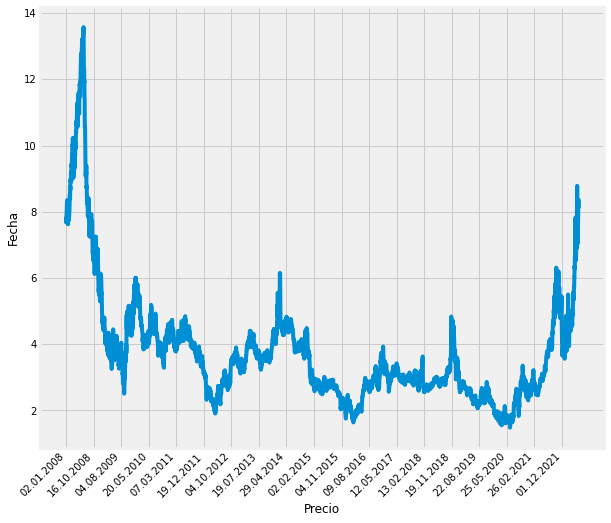

In [12]:
plotUtils.plotFunctionWithDates(last_price_day_gas, gas["Fecha"], "2008 - 2022", "Precio", "Fecha")

## Rendimientos (compund returns)

In [13]:
def compondReturn(dataFrame):
    array = np.empty(dataFrame.size)
    for i in dataFrame.index:
        array[i] = 100 * np.log10(dataFrame[i+1] / dataFrame[i])
        # remove outsiders
        if np.absolute(array[i]) > 10:
            array[i] = 0
        if (i + 1 == dataFrame.size - 1):
            break
    # Remove last value, outside
    array[-1] = 0
    return array

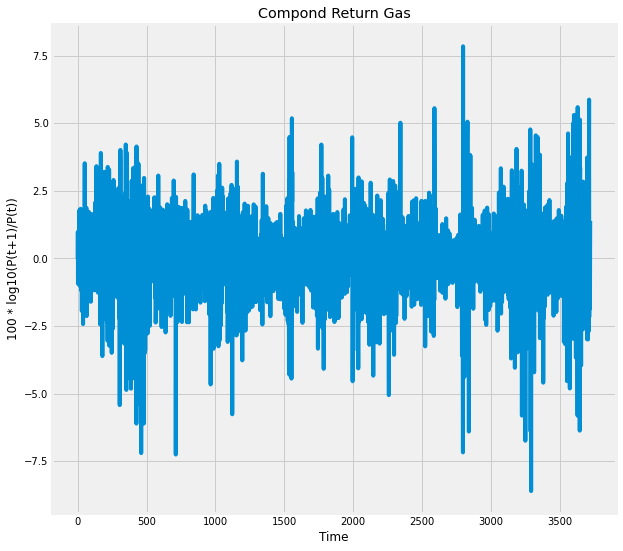

In [39]:
gas_return = compondReturn(last_price_day_gas)
plotUtils.plotFunction(gas_return,"Compond Return Gas", "Time", "100 * log10(P(t+1)/P(t))")

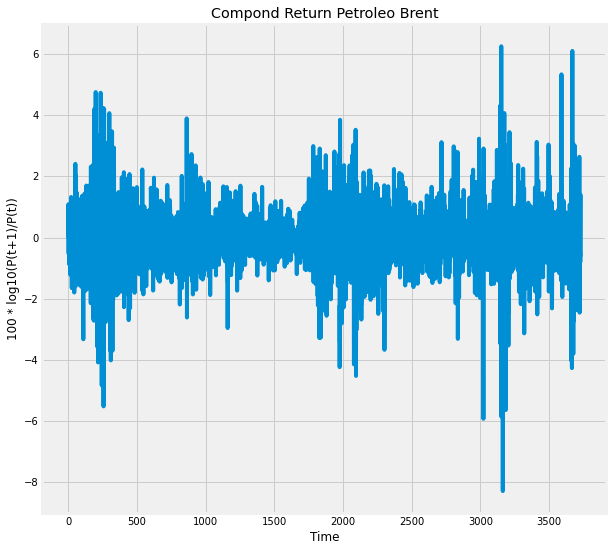

In [42]:
petroleo_brent_return = compondReturn(last_price_day_petroleo_brent)
plotUtils.plotFunction(petroleo_brent_return, "Compond Return Petroleo Brent", "Time", "100 * log10(P(t+1)/P(t))")

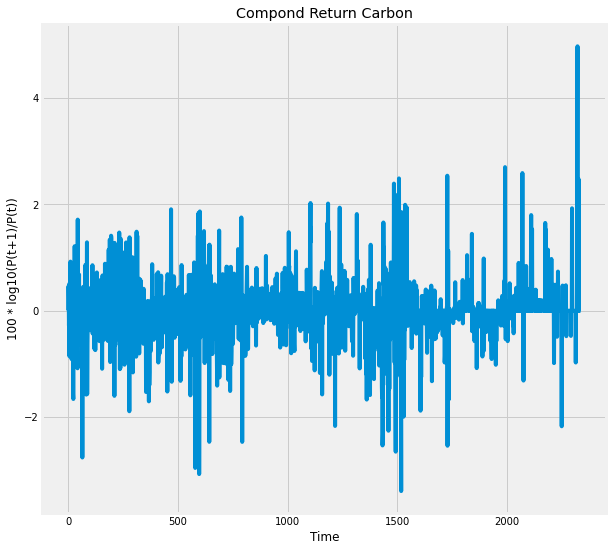

In [18]:
carbon_return = compondReturn(last_price_day_carbon)
plotUtils.plotFunction(carbon_return, "Compond Return Carbon", "Time", "100 * log10(P(t+1)/P(t))")

# Descriptive Statistic

## Frequency Distribution Histogram


In [20]:
def frequencyDistribution(compondReturn):
    # Sturge's Rule
    # bins = 1 + 3.322 * np.log10(len(compondReturn))
    # values too littles
    
    fig, ax = plt.subplots(figsize=(9, 9))
    n, bins, patches = ax.hist(compondReturn, round(20))
    ax.set_title('Frequency Histogram', size = 19)
    plt.show()

    fig, ax = plt.subplots(nrows = 2, ncols = 1,figsize=(9, 9))
    ax[0].plot(bins[:len(n)], n)
    ax[1].plot(np.cumsum(n))
    ax[0].set_title('Empirical Cumulative', size = 19)
    ax[1].set_title('Cumulative Sum', size = 19)
    plt.show()

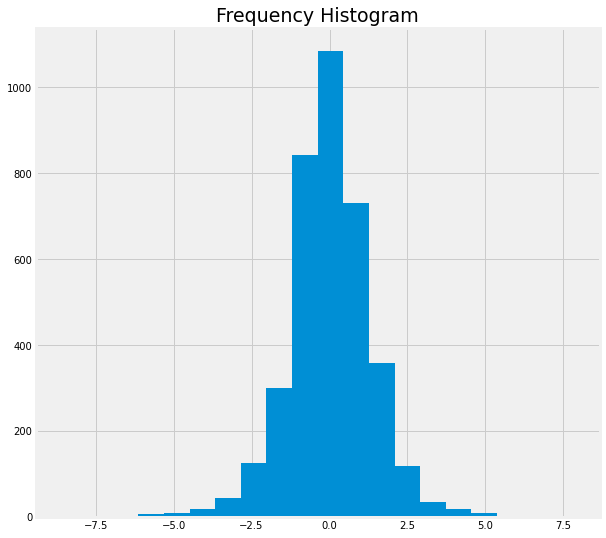

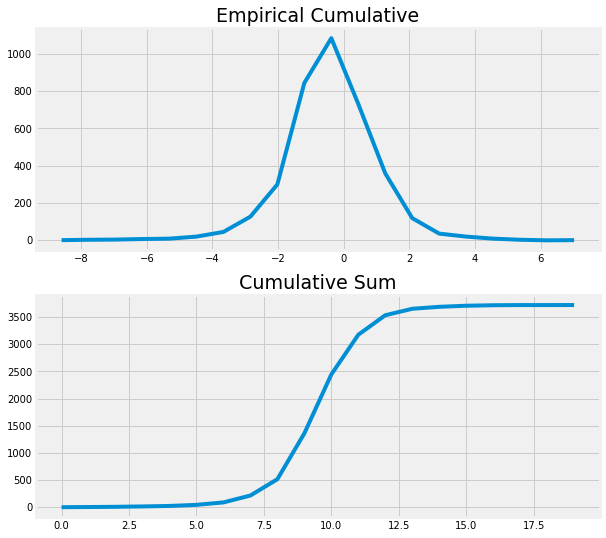

In [21]:
frequencyDistribution(gas_return)

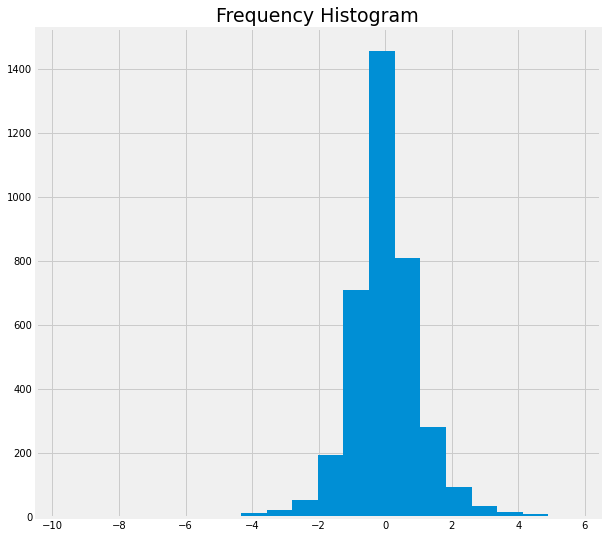

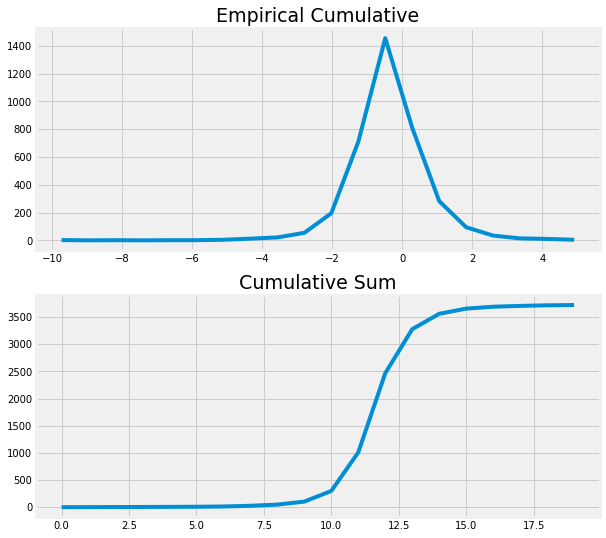

In [22]:
frequencyDistribution(petroleo_wti_return)

## Basic Numeric Descriptives


### Mean


In [23]:
def geometricMean(compondReturn):
    # Geometric name cannot be applied negative values
    return sp.stats.mstats.gmean(compondReturn + 20) - 20

In [24]:
def arithmeticMean(compondReturn):
    return np.nanmean(compondReturn)

In [25]:
arithmeticMean(gas_return)

0.0027507368561683885

In [26]:
geometricMean(gas_return)

-0.04510054885609449

In [27]:
arithmeticMean(petroleo_brent_return)

-0.007968764976951911

### Standard Deviation

In [28]:
def standarDeviation(compondReturn):
    return np.std(compondReturn)

In [29]:
standarDeviation(gas_return)

1.3642329568918585

In [30]:
standarDeviation(petroleo_brent_return)

1.0158586553286482

### Max and min

In [31]:
gas_return.max()

7.840977278083475

In [32]:
gas_return.min()

-8.598352606247712

In [33]:
petroleo_brent_return.max()

6.248524997316641

In [34]:
petroleo_brent_return.min()

-8.285210071393177

## Swekness

For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [35]:
def skew(compondReturn):
    return stats.skew(compondReturn)

In [36]:
skew(gas_return)

-0.2940957942535622

In [37]:
skew(petroleo_brent_return)

-0.12292407086457838

## Q-Q Plot

## Jarque-Bera Test

## Box plots

# Propiedades dinámicas de los rendimientos

## Incorrelación de los rendimientos

## Autocorrelación dinámicas de los rendimientos

## Leverage Effect
